In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load data
df = pd.read_csv('./Form-714-csv-files-June-2021/Part 3 Schedule 2 - Planning Area Hourly Demand.csv')

In [3]:
# Initial description
print("Dataset shape:", df.shape)
print('*'*50)
print("\nFirst 5 rows:\n")
print(df.head())
print('*'*50)
print("\nData types and missing values:\n")
print(df.info())
print('*'*50)
print("\nSummary statistics:\n")
print(df.describe())
print('*'*50)
print("\nMissing values per column:\n")
print(df.isnull().sum())
print('*'*50)

Dataset shape: (655278, 58)
**************************************************

First 5 rows:

   respondent_id  report_yr  report_prd  spplmnt_num  row_num  \
0              2       2006          12            0      100   
1              2       2006          12            0      200   
2              2       2006          12            0      300   
3              2       2006          12            0      400   
4              2       2006          12            0      500   

          plan_date timezone  hour01  hour02  hour03  ...  hour16_f  hour17_f  \
0  1/1/2006 0:00:00              0.0     0.0     0.0  ...         0         0   
1  1/2/2006 0:00:00              0.0     0.0     0.0  ...         0         0   
2  1/3/2006 0:00:00              0.0     0.0     0.0  ...         0         0   
3  1/4/2006 0:00:00              0.0     0.0     0.0  ...         0         0   
4  1/5/2006 0:00:00              0.0     0.0     0.0  ...         0         0   

   hour18_f  hour19_f  hour

In [4]:
# Missing Values
to_drop = []
# Drop columns with excessive missing values
df.drop(to_drop, axis=1, inplace=True)

# Fill numerical missing values with median
median_fill = []
for a_col in median_fill:
    df[a_col].fillna(df[a_col].median(), inplace=True)

# Fill categorical missing values with mode
mode_fill = []
for a_col in mode_fill:
    df[a_col].fillna(df[a_col].mode()[0], inplace=True)

# Advanced imputation using SimpleImputer
# 'mean', 'median', 'most_frequent', ('constant', fill_value=xxx)
imputer = SimpleImputer(strategy='most_frequent')
imputer_fill = []
if len(imputer_fill) > 0:
    df[imputer_fill] = imputer.fit_transform(df[imputer_fill])


In [5]:
# Duplicates
print("\nNumber of duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicates after:", df.duplicated().sum())



Number of duplicates before: 0
Number of duplicates after: 0


In [6]:
# Categorical Data
category_columns = ['respondent_id']
for a_col in category_columns:
    df[a_col] = df[a_col].astype('category')

In [7]:
# Outliers
# Using IQR method
clip_outliers = True
outlier_columns = [f'hour{ii:02}' for ii in range(1, 26)]
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Low outliers:\n')
print((df[outlier_columns] <= lower_bound).mean())
print()
print('High outliers:\n')
print((df[outlier_columns] >= upper_bound).mean())

# Clip outliers
if clip_outliers:
    df[outlier_columns] = df[outlier_columns].clip(
        lower=lower_bound, upper=upper_bound, axis=1)


Low outliers:

hour01    0.000000
hour02    0.000000
hour03    0.000000
hour04    0.000000
hour05    0.000000
hour06    0.000000
hour07    0.000000
hour08    0.000000
hour09    0.000000
hour10    0.000000
hour11    0.000000
hour12    0.000000
hour13    0.000000
hour14    0.000000
hour15    0.000000
hour16    0.000000
hour17    0.000000
hour18    0.000000
hour19    0.000000
hour20    0.000000
hour21    0.000000
hour22    0.000000
hour23    0.000000
hour24    0.000000
hour25    0.981773
dtype: float64

High outliers:

hour01    0.128031
hour02    0.128307
hour03    0.128948
hour04    0.129656
hour05    0.130197
hour06    0.130897
hour07    0.132582
hour08    0.133630
hour09    0.133681
hour10    0.133803
hour11    0.133990
hour12    0.134142
hour13    0.133855
hour14    0.133180
hour15    0.132260
hour16    0.131784
hour17    0.131799
hour18    0.131083
hour19    0.129556
hour20    0.128515
hour21    0.128503
hour22    0.128480
hour23    0.128632
hour24    0.128228
hour25    1.000000
dty

In [8]:
# Standardize strings
string_cols = ['timezone']
for a_col in string_cols:
    df[a_col] = df[a_col].str.lower().str.strip()


In [9]:
# Encode Categorical Variables
dum_cols = [a_col + '_dum' for a_col in category_columns]
df[dum_cols] = df[category_columns]
df = pd.get_dummies(df, columns=dum_cols, prefix=category_columns)


In [10]:
# Feature Scaling
scaler = StandardScaler()
scale_columns = [f'hour{ii:02}' for ii in range(1, 26)]
scaled_names = [a_col + '_scaled' for a_col in scale_columns]
df[scaled_names] = scaler.fit_transform(df[scale_columns])


In [11]:
# second look
print("\nCleaned dataset info:")
print(df.info())
print("\nCleaned summary statistics:")
print(df.describe())



Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655278 entries, 0 to 655277
Columns: 271 entries, respondent_id to hour25_scaled
dtypes: bool(188), category(1), float64(50), int64(30), object(2)
memory usage: 528.7+ MB
None

Cleaned summary statistics:
           report_yr  report_prd  spplmnt_num        row_num         hour01  \
count  655278.000000    655278.0     655278.0  655278.000000  655278.000000   
mean     2012.143426        12.0          0.0   18313.069873    1667.158681   
std         4.380471         0.0          0.0   10544.187354    1829.628704   
min      2006.000000        12.0          0.0     100.000000    -184.000000   
25%      2008.000000        12.0          0.0    9200.000000     288.400000   
50%      2012.000000        12.0          0.0   18300.000000     902.000000   
75%      2016.000000        12.0          0.0   27400.000000    2370.000000   
max      2020.000000        12.0          0.0   36600.000000    5492.400000   

          

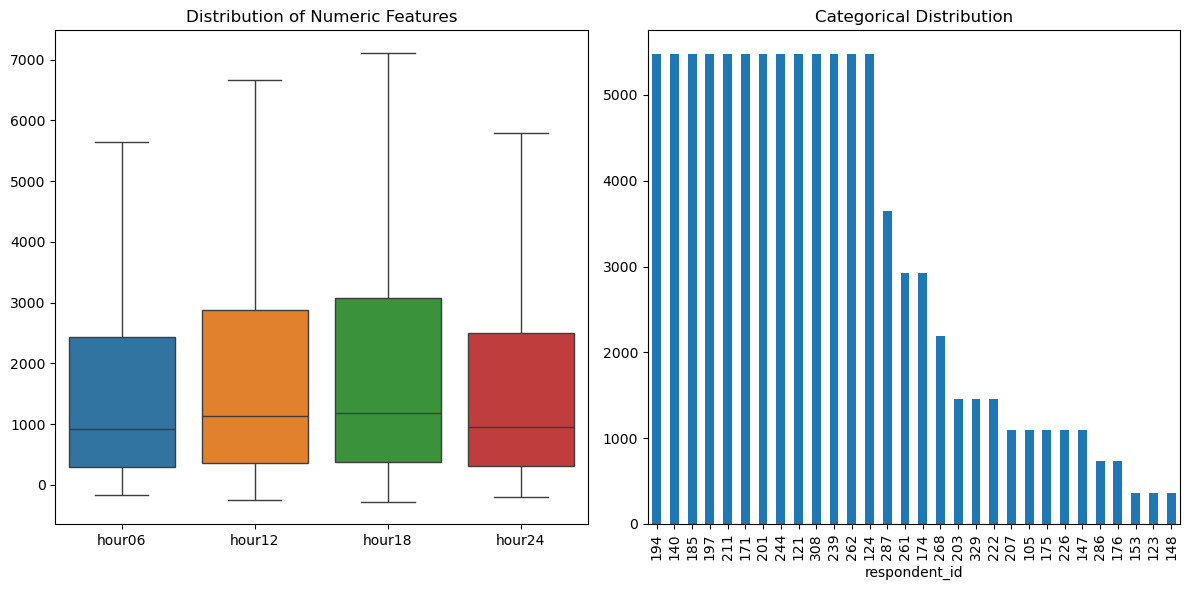

In [25]:
# plots
to_plot = ['hour06', 'hour12', 'hour18', 'hour24']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[to_plot])
plt.title('Distribution of Numeric Features')

plt.subplot(1, 2, 2)
df['respondent_id'].value_counts().iloc[
    np.random.choice(
        range(len(df['respondent_id'].unique())),
        30, replace=False)
    ].sort_values()[::-1].plot(kind='bar')
plt.title('Categorical Distribution')
plt.tight_layout()
plt.show()